In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns  # Imorting Seaborn library
import os
#, r2_score
#column 140 is age


df=pd.read_csv('Group16_RegressionData (1).csv', index_col=0)
df.head()
df.tail()
y=df.Age
x = df.drop(["dataset"], axis=1) 
x= x.drop(["Age"], axis=1) 
x= x.drop(["Left-WM-hypointensities"], axis=1) 
x= x.drop(["Right-WM-hypointensities"], axis=1) 
x= x.drop(["Left-non-WM-hypointensities"], axis=1) 
x= x.drop(["Right-non-WM-hypointensities"], axis=1)
x.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 1 to 4226
Columns: 134 entries, Left-Lateral-Ventricle to eTIV.1
dtypes: float64(122), int64(12)
memory usage: 4.4 MB


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc=StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(x_train_scaled, y_train)

y_pred_test = mlp_reg.predict(x_test_scaled)
y_pred_train = mlp_reg.predict(x_train_scaled)

r2_train = r2_score(y_train, y_pred_train)
print("Training r2 for Multiple Linear Regression Model: ", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Testing r2 for Multiple Linear Regression Model: ", r2_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training r2 for Multiple Linear Regression Model:  0.9938883736964773
Testing r2 for Multiple Linear Regression Model:  0.8069825755964567
RMSE for Training Data:  1.564102776097187
RMSE for Testing Data:  8.897654288001409


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Neural Network Regression'}, xlabel='Age'>

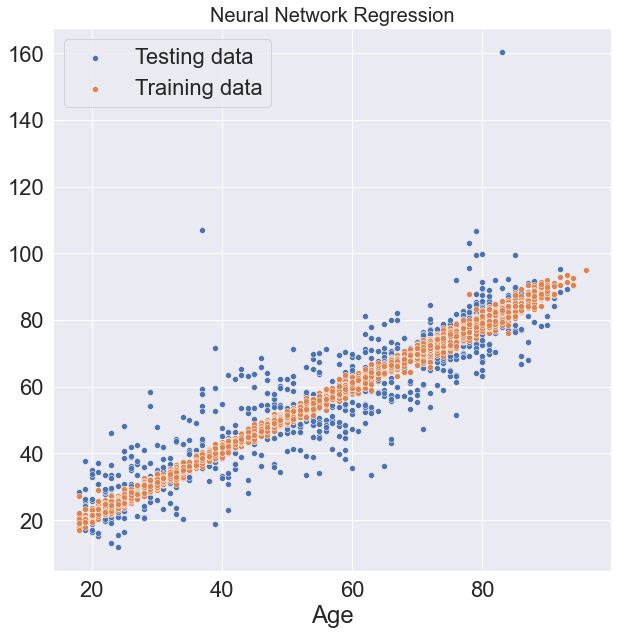

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Neural Network Regression", fontsize=20)
sns.set(font_scale = 2)
sns.scatterplot(y_test, y_pred_test, label="Testing data")
sns.scatterplot(y_train, y_pred_train, label="Training data")


In [ ]:
from eiffel2 import builder

builder([150, 100, 50], bmode="night") #Will bring up new window to show NN architecture